In [1]:
import torch
from datasets import load_dataset, get_observation_pixels
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

from config import load_config, get_model_name
config = load_config("vae")

train_loader, test_loader, val_loader = load_dataset(config["data_params"])

model_name = get_model_name(config)

In [2]:
from trainers import SuperTrainer, ModelTrainer

model = ModelTrainer(config['model_params'], model_name=config['model_name'])

from trainers import SuperTrainer
trainer = SuperTrainer(**config['trainer_params'], model_name=model_name)
trainer.fit(model, train_loader, val_loader)
#save
trainer.save_model_checkpoint()

/Home/siv34/edzak2974/.conda/envs/pytorch_masters/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /Home/siv34/edzak2974/.conda/envs/pytorch_masters/li ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Home/siv34/edzak2974/.conda/envs/pytorch_masters/lib/python3.10/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /Home/siv34/edzak2974/.conda/envs/pytorch_masters/li ...
  rank_zero_warn(
You are using a CUDA device ('A100-S

Epoch 49: 100%|██████████| 469/469 [00:06<00:00, 75.82it/s, v_num=2, train_recon_loss=2.76e+3, train_kl_loss=528.0, train_loss=3.29e+3, val_recon_loss=3.7e+3, val_kl_loss=707.0, val_loss=4.41e+3] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 469/469 [00:06<00:00, 75.79it/s, v_num=2, train_recon_loss=2.76e+3, train_kl_loss=528.0, train_loss=3.29e+3, val_recon_loss=3.7e+3, val_kl_loss=707.0, val_loss=4.41e+3]


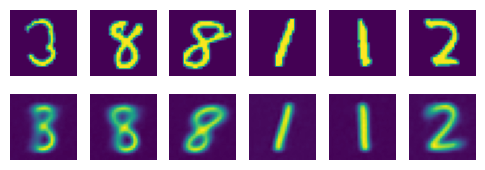

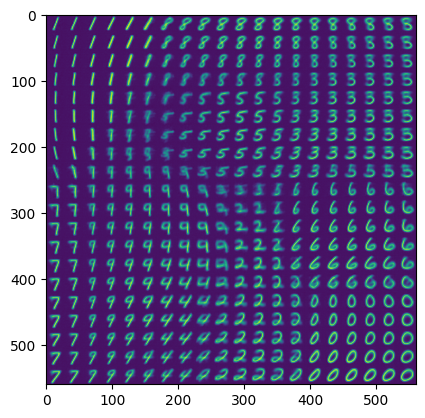

In [3]:
model = ModelTrainer.load_model_checkpoint(model_name)
model.eval()

from plotting import plot_samples_with_reconstruction
from plotting import plot_latent_images
# plot some samples and their reconstructions

plot_samples_with_reconstruction(model, next(iter(test_loader)))
plot_latent_images(model)